In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
import warnings
import itertools
from pylab import rcParams
from prophet import Prophet

In [79]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [80]:
df = pd.read_excel("train.xlsx")
data = df.loc[df['Category'] == 'Office Supplies', ['Order Date', 'Sales']]
data['Order Date'].min(), data['Order Date'].max()
data

,Order Date,Sales
2,2017-06-12,14.620
4,2016-10-11,22.368
6,2015-06-09,7.280
8,2015-06-09,18.504
9,2015-06-09,114.900
...,...,...
9791,2015-05-21,56.064
9793,2015-05-21,4.832
9794,2015-05-21,18.240
9795,2017-05-21,3.798


In [81]:
data = data.sort_values('Order Date')
data.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [82]:
data = data.groupby('Order Date')['Sales'].sum().reset_index()
data

,Order Date,Sales
0,2015-01-03,16.448
1,2015-01-04,288.060
2,2015-01-05,19.536
3,2015-01-06,685.340
4,2015-01-07,10.430
...,...,...
1138,2018-12-26,814.594
1139,2018-12-27,13.248
1140,2018-12-28,1091.244
1141,2018-12-29,282.440


In [83]:
data = data.set_index('Order Date')
data.index

DatetimeIndex(['2015-01-03', '2015-01-04', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-09', '2015-01-10', '2015-01-13',
               '2015-01-16', '2015-01-18',
               ...
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1143, freq=None)

In [84]:
y = data['Sales'].resample('MS').mean()
y['2018':]

Order Date
2018-01-01     956.953591
2018-02-01     388.324842
2018-03-01     538.568370
2018-04-01     526.479519
2018-05-01     499.770519
2018-06-01     546.965423
2018-07-01     393.821385
2018-08-01    1146.137077
2018-09-01    1128.840107
2018-10-01     873.400000
2018-11-01    1124.012036
2018-12-01    1022.000414
Freq: MS, Name: Sales, dtype: float64

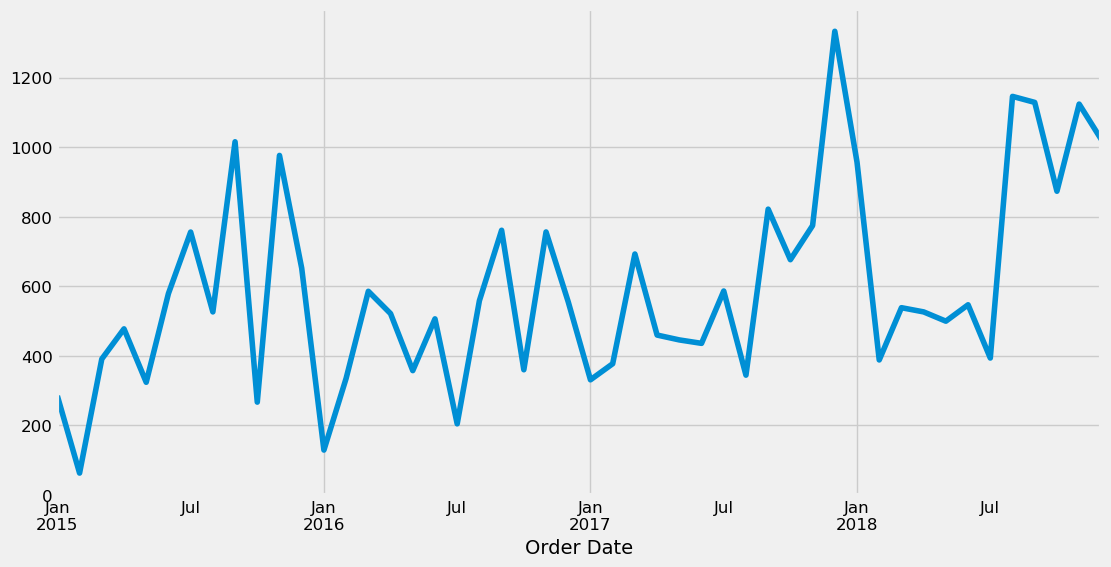

In [85]:
y.plot(figsize = (12, 6))
plt.show()

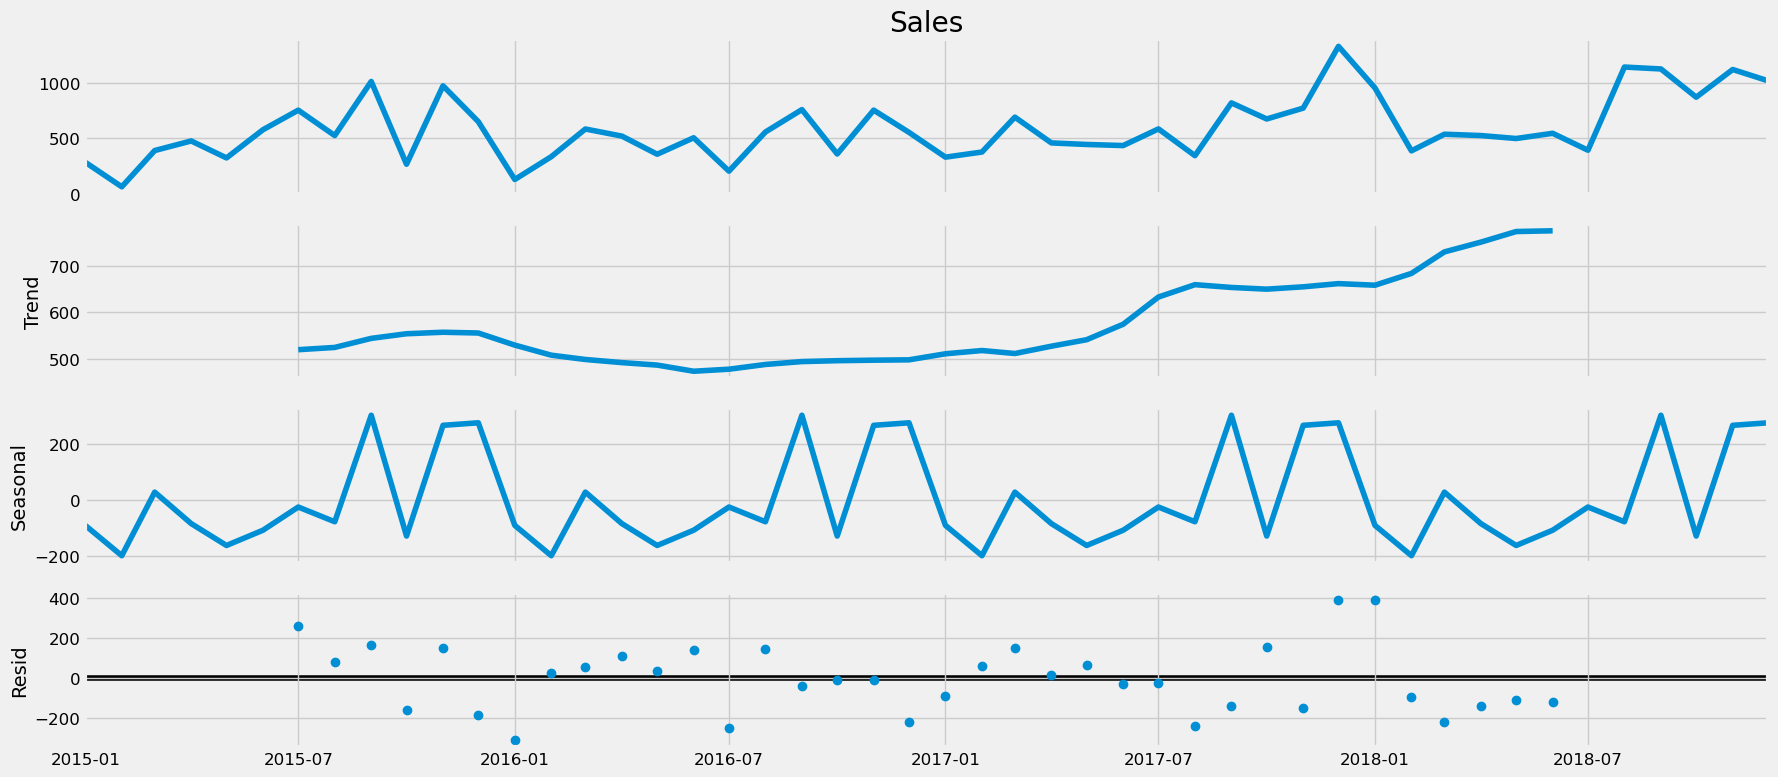

In [86]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [87]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [88]:
print('Examples of parameter combinations for Seasonal ARIMA:')
print('SARIMAX: {} X {}' .format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} X {}' .format(pdq[2], seasonal_pdq[2]))
print('SARIMAX: {} X {}' .format(pdq[3], seasonal_pdq[3]))
print('SARIMAX: {} X {}' .format(pdq[4], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA:
SARIMAX: (0, 0, 1) X (0, 0, 1, 12)
SARIMAX: (0, 1, 0) X (0, 1, 0, 12)
SARIMAX: (0, 1, 1) X (0, 1, 1, 12)
SARIMAX: (1, 0, 0) X (1, 0, 0, 12)


In [89]:
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = seasonal_param, enforce_stationarity = False, enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA:{} x {}12 - AIC:{}'.format(param, seasonal_param, results.aic))
        except:
            continue

ARIMA:(0, 0, 0) x (0, 0, 0, 12)12 - AIC:745.785108307311
ARIMA:(0, 0, 0) x (0, 0, 1, 12)12 - AIC:1609.3472845229194
ARIMA:(0, 0, 0) x (0, 1, 0, 12)12 - AIC:498.8308917559917
ARIMA:(0, 0, 0) x (0, 1, 1, 12)12 - AIC:332.919731165441
ARIMA:(0, 0, 0) x (1, 0, 0, 12)12 - AIC:514.1730803576957
ARIMA:(0, 0, 0) x (1, 0, 1, 12)12 - AIC:1760.8375185514026
ARIMA:(0, 0, 0) x (1, 1, 0, 12)12 - AIC:346.6194401828426
ARIMA:(0, 0, 0) x (1, 1, 1, 12)12 - AIC:333.8632878970721
ARIMA:(0, 0, 1) x (0, 0, 0, 12)12 - AIC:701.1580021511512
ARIMA:(0, 0, 1) x (0, 0, 1, 12)12 - AIC:2731.495251243803
ARIMA:(0, 0, 1) x (0, 1, 0, 12)12 - AIC:485.90012072112313
ARIMA:(0, 0, 1) x (0, 1, 1, 12)12 - AIC:319.1357349738537
ARIMA:(0, 0, 1) x (1, 0, 0, 12)12 - AIC:515.5825080627565
ARIMA:(0, 0, 1) x (1, 0, 1, 12)12 - AIC:2651.0456016813537
ARIMA:(0, 0, 1) x (1, 1, 0, 12)12 - AIC:344.996817321398
ARIMA:(0, 0, 1) x (1, 1, 1, 12)12 - AIC:320.1616647190842
ARIMA:(0, 1, 0) x (0, 0, 0, 12)12 - AIC:664.2929060935322
ARIMA:(0, 1, 

In [90]:
mod = sm.tsa.statespace.SARIMAX(y, order = (0, 1, 1), seasonal_order = (0, 1, 1, 12), enforce_stationarity = False, enforce_invertibility = False, initialization='approximate_diffuse')
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8523      0.161     -5.290      0.000      -1.168      -0.537
ma.S.L12      -1.4554      1.897     -0.767      0.443      -5.174       2.263
sigma2      2.774e+04   5.47e+04      0.507      0.612   -7.96e+04    1.35e+05


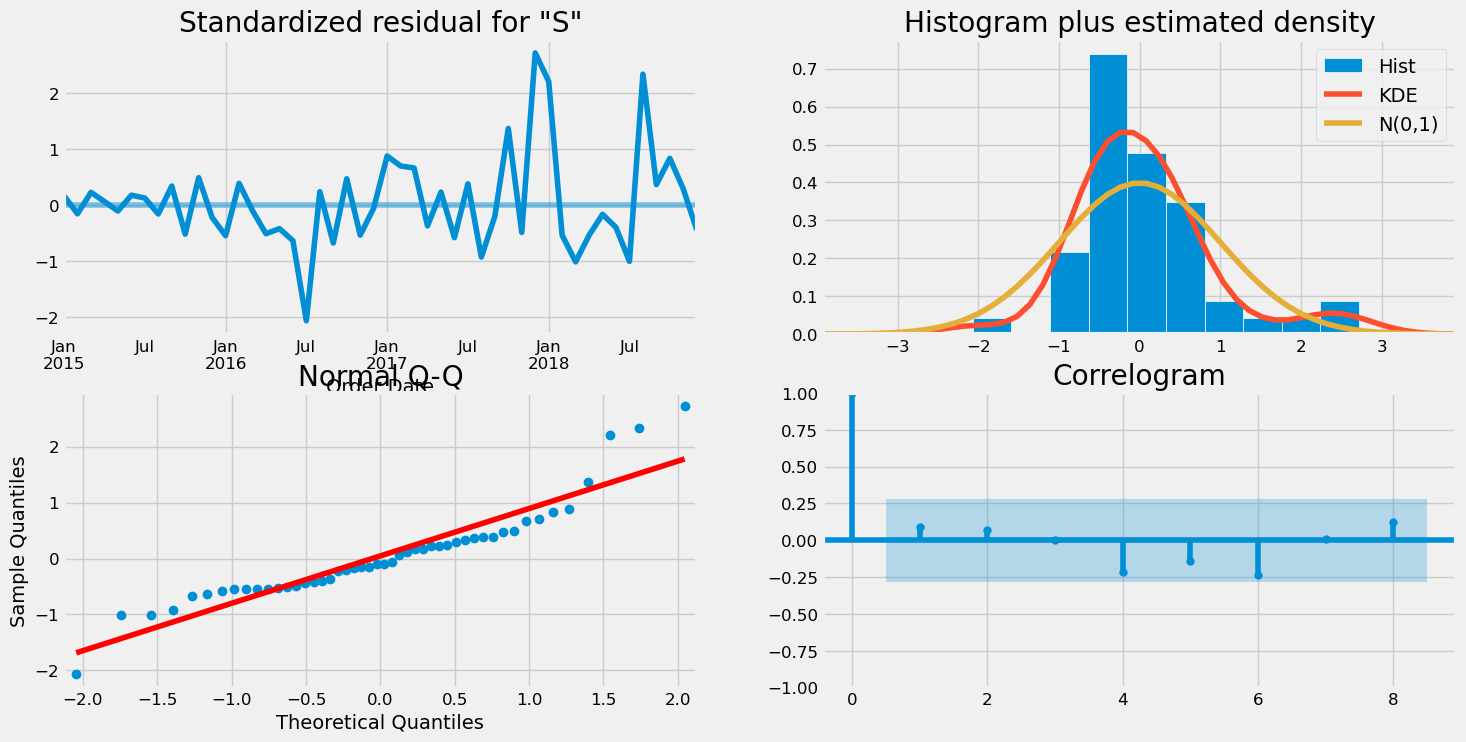

In [91]:
results.plot_diagnostics(figsize = (16, 8), lags = 8)
plt.show()

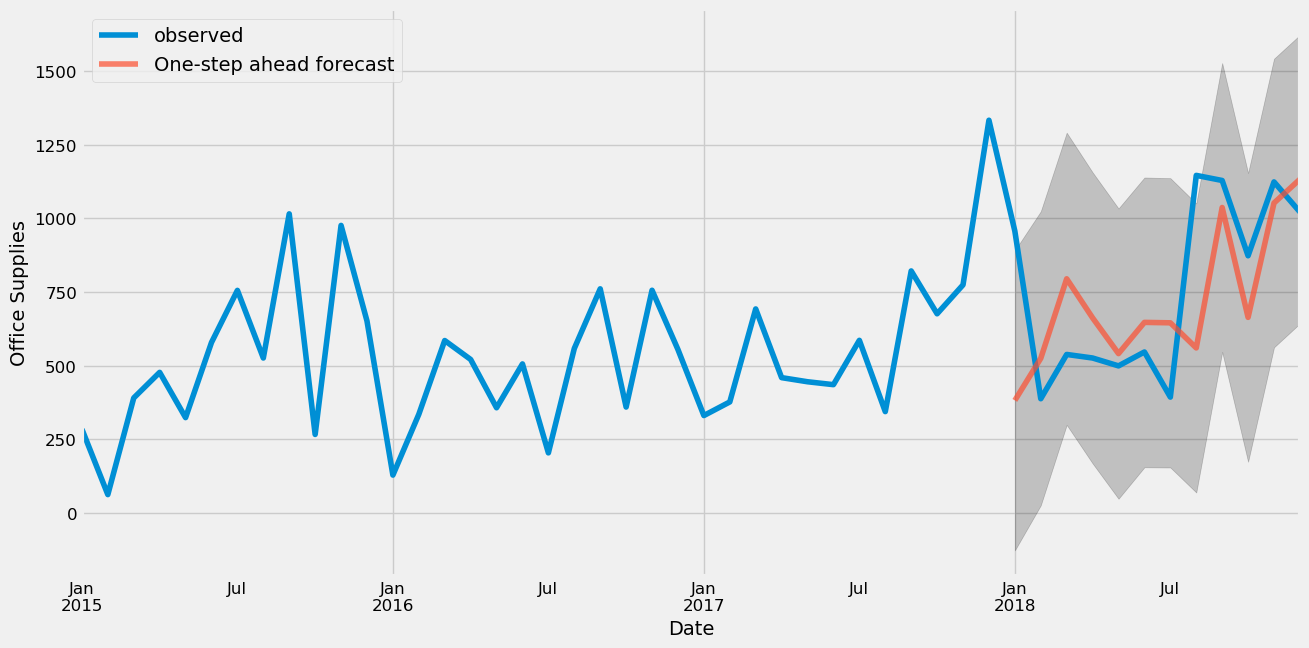

In [92]:
pred = results.get_prediction(start = pd.to_datetime('2018-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = y['2015':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead forecast', alpha = .7, figsize = (14, 7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies')
plt.legend()
plt.show()

In [93]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('Mean squared error{} ' .format(round(mse, 2)))
print('Root mean squared error{} ' .format(round(np.sqrt(mse), 2)))

Mean squared error76736.43 
Root mean squared error277.01 


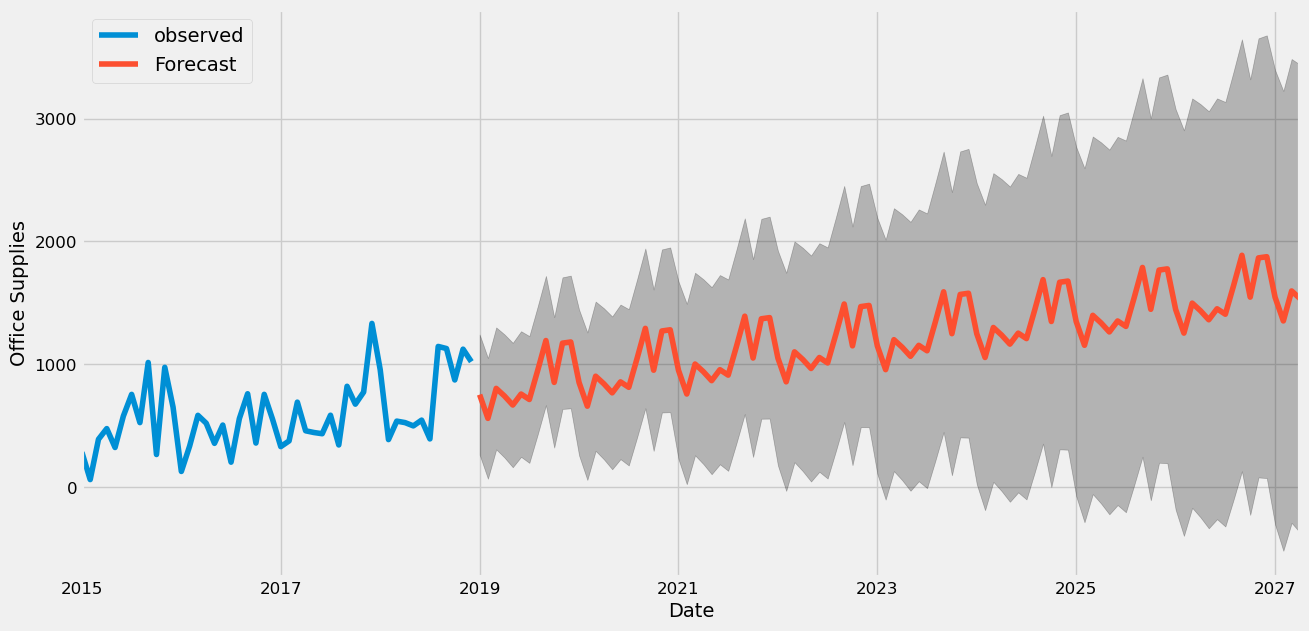

In [94]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies')
plt.legend()
plt.show()

In [95]:
furniture = df.loc[df['Category'] == 'Furniture', ['Order Date', 'Sales']]
tech = df.loc[df['Category'] == 'Technology', ['Order Date', 'Sales']]
furniture.shape, tech.shape

((2078, 2), (1813, 2))

In [102]:
furniture

,Order Date,Sales
0,2015-01-01,518.106417
1,2015-02-01,367.931600
2,2015-03-01,837.845176
3,2015-04-01,567.488357
4,2015-05-01,432.049188
5,2015-06-01,691.820084
6,2015-07-01,601.169500
7,2015-08-01,475.014033
8,2015-09-01,992.353367
9,2015-10-01,769.015437


In [103]:
tech

,Order Date,Sales
0,2015-01-01,449.041429
1,2015-02-01,229.787143
2,2015-03-01,2157.331600
3,2015-04-01,640.938857
4,2015-05-01,564.698588
5,2015-06-01,766.905909
6,2015-07-01,522.618933
7,2015-08-01,687.465385
8,2015-09-01,2025.583200
9,2015-10-01,596.900900


In [98]:
furniture = furniture.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date': y_furniture.index, 'Sales': y_furniture.values})

tech = tech.sort_values('Order Date')
tech = tech.groupby('Order Date')['Sales'].sum().reset_index()
tech = tech.set_index('Order Date')
y_tech = tech['Sales'].resample('MS').mean()
tech = pd.DataFrame({'Order Date': y_tech.index, 'Sales': y_tech.values})

store = furniture.merge(tech, how = 'inner', on = 'Order Date')
store.rename(columns = {'Sales_x':'Furniture Sales',  'Sales_y':'Tech Sales'}, inplace = True)
store.head()

,Order Date,Furniture Sales,Tech Sales
0,2015-01-01,518.106417,449.041429
1,2015-02-01,367.931600,229.787143
2,2015-03-01,837.845176,2157.331600
3,2015-04-01,567.488357,640.938857
4,2015-05-01,432.049188,564.698588


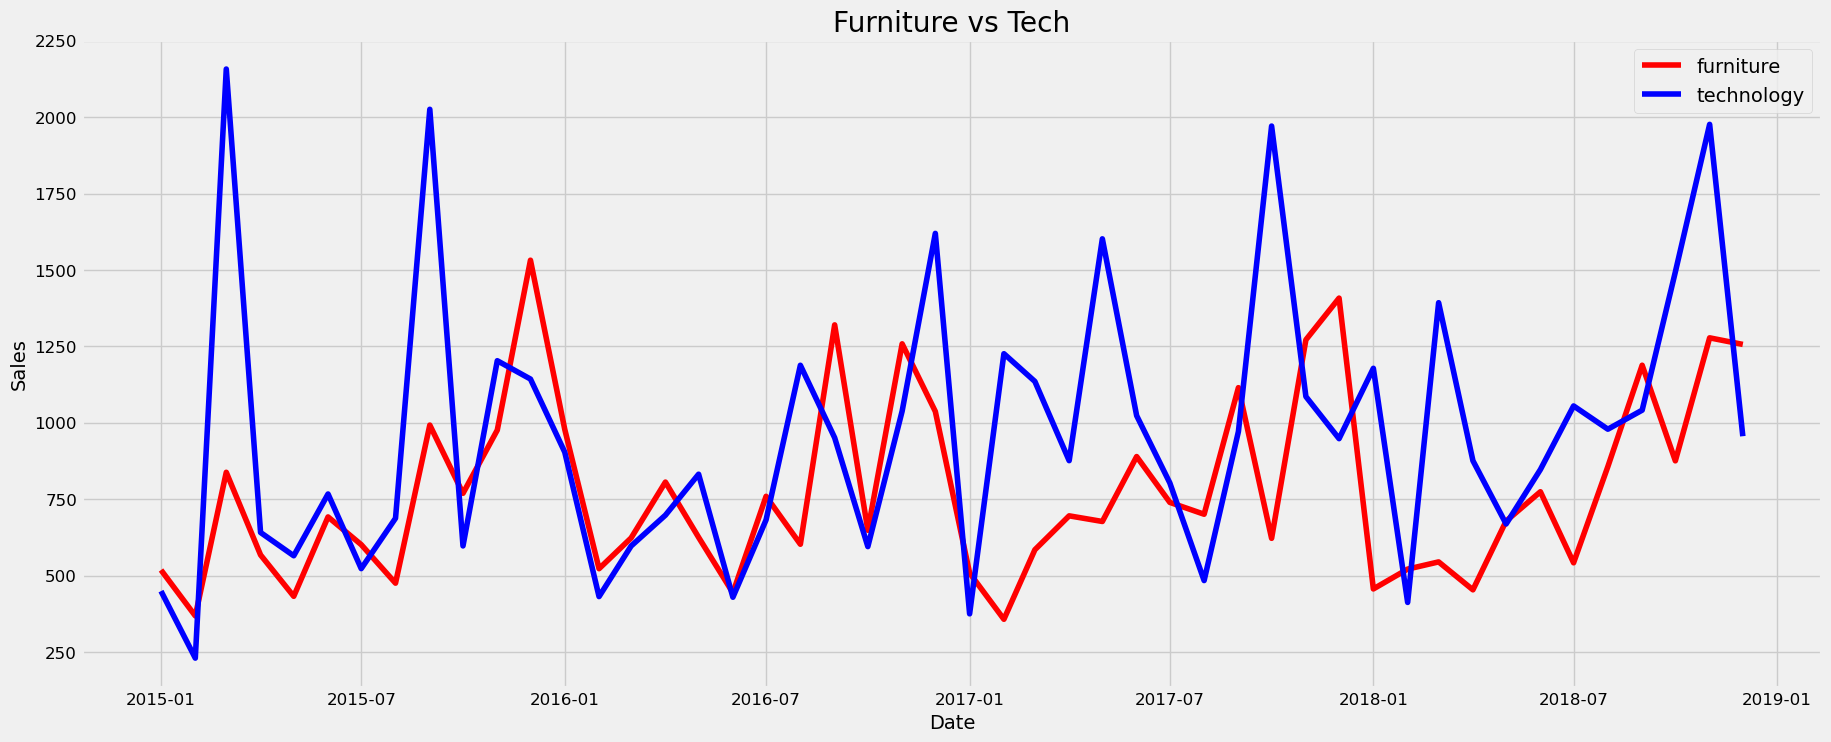

In [101]:
plt.figure(figsize = (20, 8))
plt.plot(store['Order Date'], store['Furniture Sales'], 'r-', label = 'furniture')
plt.plot(store['Order Date'], store['Tech Sales'], 'b-', label = 'technology')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Tech')
plt.legend()
plt.show()

In [104]:
furniture = furniture.rename(columns = {'Order Date':'ds', 'Sales':'y'})
furniture_model = Prophet(interval_width = 0.95)
furniture_model.fit(furniture)
furniture_forecast = furniture_model.make_future_dataframe(periods = 36, freq = 'MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

21:16:44 - cmdstanpy - INFO - Chain [1] start processing
21:16:44 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Furniture Sales')

<Figure size 1800x600 with 0 Axes>

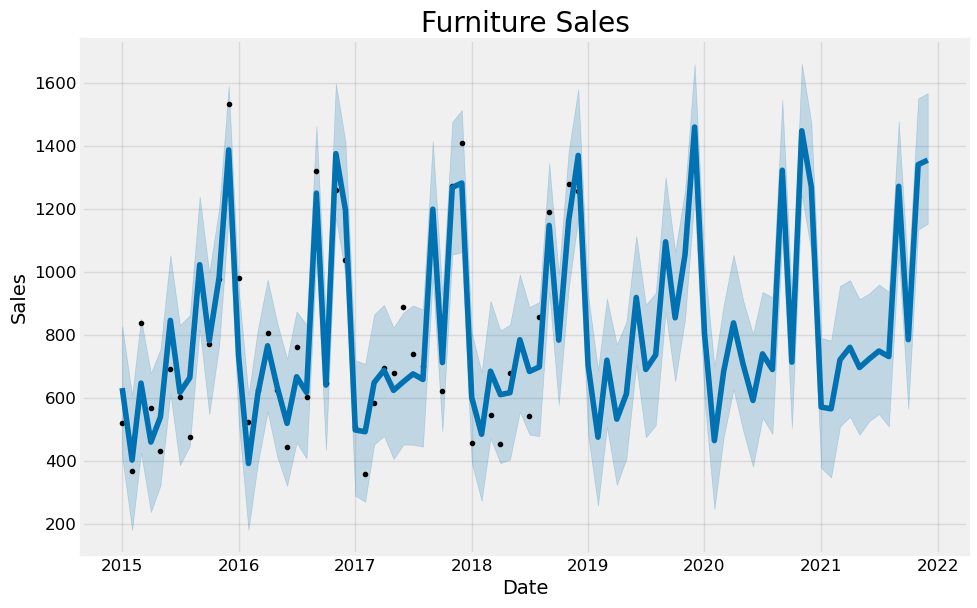

In [105]:
plt.figure(figsize = (18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales')

21:17:05 - cmdstanpy - INFO - Chain [1] start processing
21:17:06 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Technology Sales')

<Figure size 1800x600 with 0 Axes>

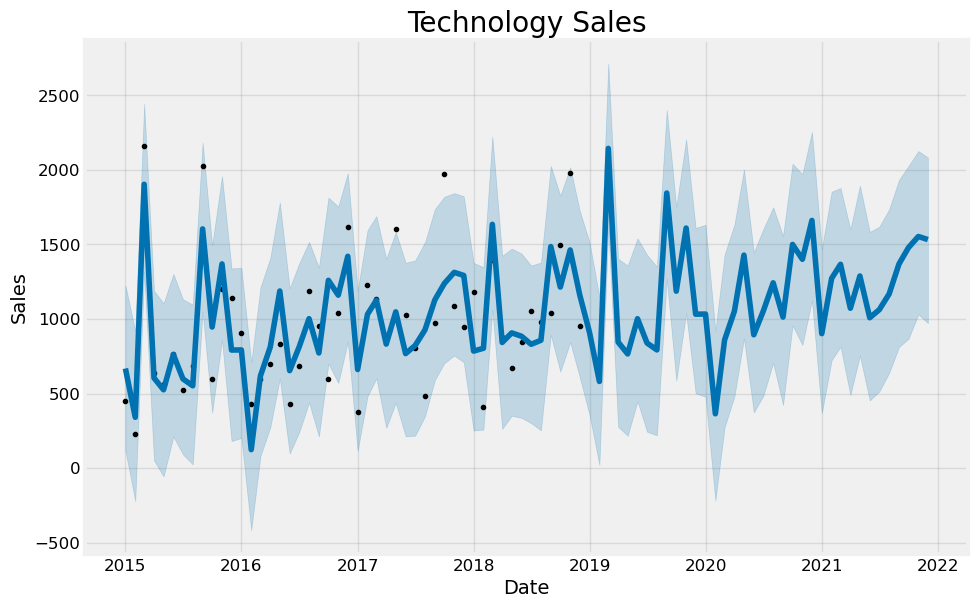

In [106]:
tech = tech.rename(columns = {'Order Date':'ds', 'Sales':'y'})
tech_model = Prophet(interval_width = 0.95)
tech_model.fit(tech)
tech_forecast = tech_model.make_future_dataframe(periods = 36, freq = 'MS')
tech_forecast = tech_model.predict(tech_forecast)

plt.figure(figsize = (18, 6))
tech_model.plot(tech_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Technology Sales')

In [114]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
merge_furniture_forecast = furniture_forecast.copy()
merge_furniture_forecast.columns = furniture_names

tech_names = ['tech_%s' % column for column in tech_forecast.columns]
merge_tech_forecast = tech_forecast.copy()
merge_tech_forecast.columns = tech_names

forecast = pd.merge(merge_furniture_forecast, merge_tech_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'tech_ds')
forecast = forecast.rename(columns = {'furniture_ds':'Date'}).drop('tech_ds', axis = 1)
forecast

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,tech_additive_terms,tech_additive_terms_lower,tech_additive_terms_upper,tech_yearly,tech_yearly_lower,tech_yearly_upper,tech_multiplicative_terms,tech_multiplicative_terms_lower,tech_multiplicative_terms_upper,tech_yhat
0,2015-01-01,723.843981,412.587452,827.187476,723.843981,723.843981,-93.389698,-93.389698,-93.389698,-93.389698,...,-67.322967,-67.322967,-67.322967,-67.322967,-67.322967,-67.322967,0.0,0.0,0.0,667.938789
1,2015-02-01,725.385827,179.013827,606.822868,725.385827,725.385827,-323.719439,-323.719439,-323.719439,-323.719439,...,-399.819203,-399.819203,-399.819203,-399.819203,-399.819203,-399.819203,0.0,0.0,0.0,340.544728
2,2015-03-01,726.778461,425.082581,850.538487,726.778461,726.778461,-80.656726,-80.656726,-80.656726,-80.656726,...,1157.956835,1157.956835,1157.956835,1157.956835,1157.956835,1157.956835,0.0,0.0,0.0,1902.929182
3,2015-04-01,728.320306,236.662345,677.710750,728.320306,728.320306,-269.373874,-269.373874,-269.373874,-269.373874,...,-145.546628,-145.546628,-145.546628,-145.546628,-145.546628,-145.546628,0.0,0.0,0.0,604.527895
4,2015-05-01,729.812414,321.676452,754.109526,729.812414,729.812414,-190.835950,-190.835950,-190.835950,-190.835950,...,-230.033578,-230.033578,-230.033578,-230.033578,-230.033578,-230.033578,0.0,0.0,0.0,524.978533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2021-08-01,843.411584,508.657573,936.148315,843.411514,843.411660,-113.044899,-113.044899,-113.044899,-113.044899,...,36.460153,36.460153,36.460153,36.460153,36.460153,36.460153,0.0,0.0,0.0,1167.387426
80,2021-09-01,844.953429,1056.287790,1476.946145,844.953356,844.953508,425.949674,425.949674,425.949674,425.949674,...,232.356097,232.356097,232.356097,232.356097,232.356097,232.356097,0.0,0.0,0.0,1368.385547
81,2021-10-01,846.445538,564.149068,985.744171,846.445462,846.445618,-62.299794,-62.299794,-62.299794,-62.299794,...,337.554513,337.554513,337.554513,337.554513,337.554513,337.554513,0.0,0.0,0.0,1478.521553
82,2021-11-01,847.987383,1132.997734,1549.826268,847.987303,847.987465,491.911390,491.911390,491.911390,491.911390,...,406.836119,406.836119,406.836119,406.836119,406.836119,406.836119,0.0,0.0,0.0,1552.905335


Text(0.5, 1.0, 'Furniture vs Technology Trend')

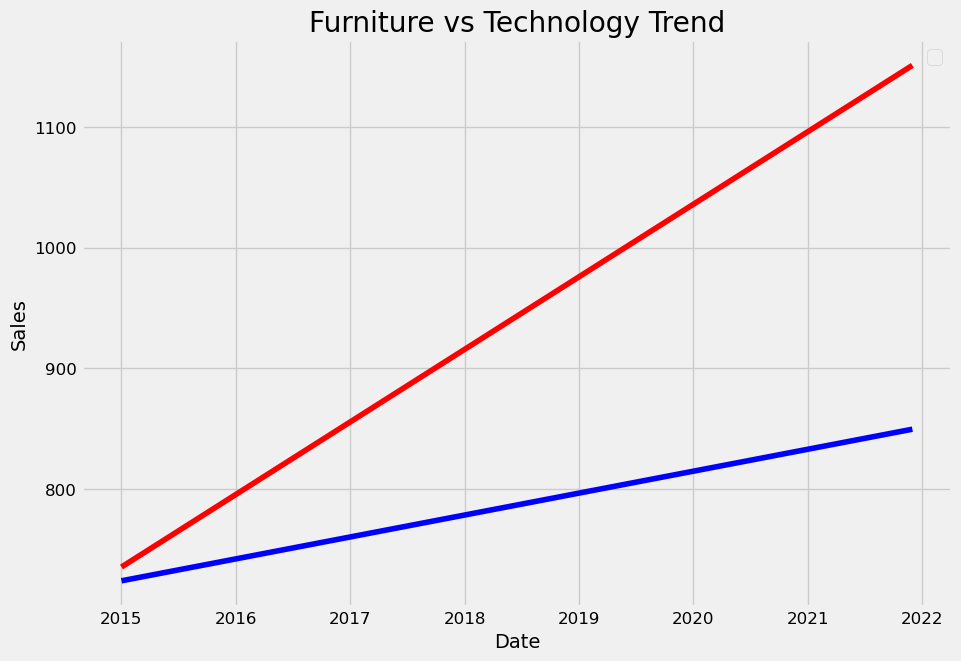

In [115]:
plt.figure(figsize = (10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['tech_trend'], 'r-')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Technology Trend')

Text(0.5, 1.0, 'Furniture vs Technology Estimate')

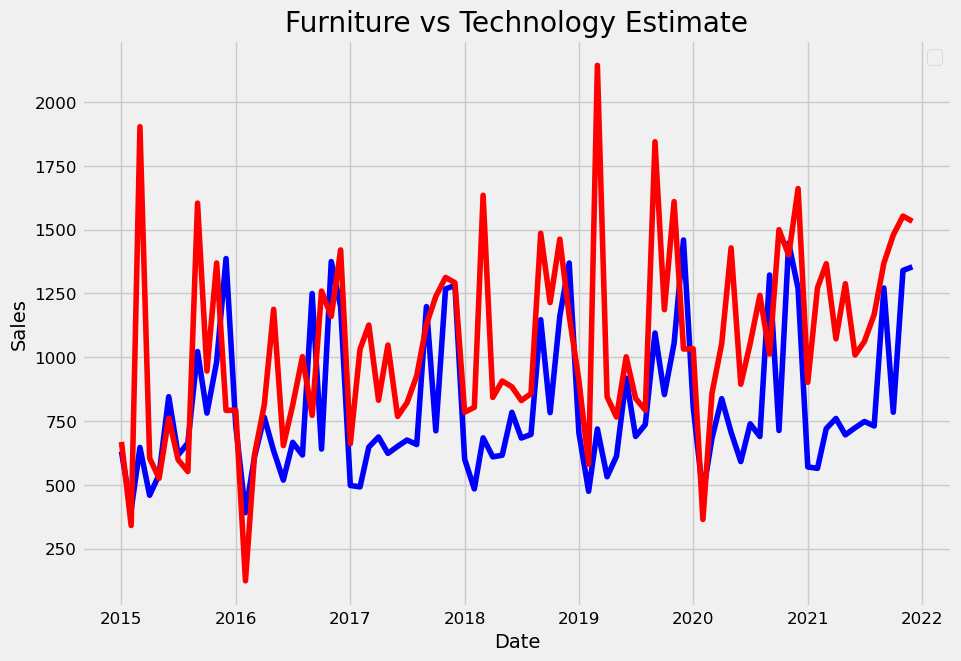

In [116]:
plt.figure(figsize = (10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['tech_yhat'], 'r-')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Technology Estimate')

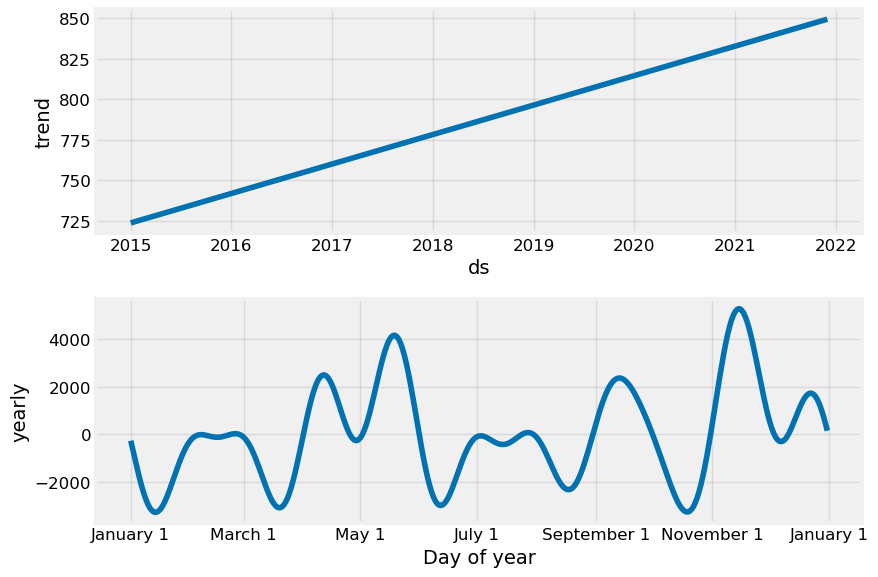

In [118]:
furniture_model.plot_components(furniture_forecast);

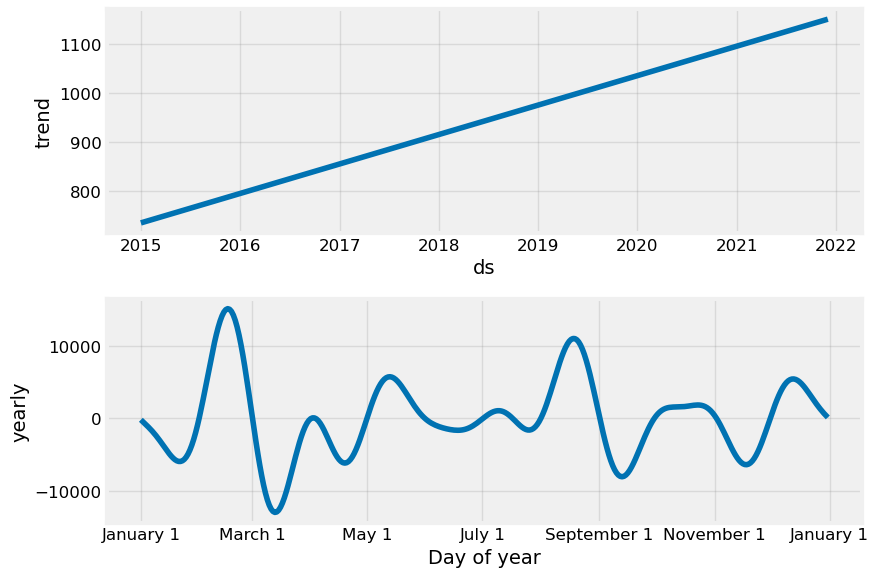

In [119]:
tech_model.plot_components(tech_forecast);